<a href="https://colab.research.google.com/github/panakb/Projekt_01/blob/main/kampan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import NearestCentroid

In [103]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv('train.csv')

In [104]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [105]:
data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# **Seznam sloupců**

age - ok, nechat jak je.

job - vyhodit hodnoty unknown

marital - label enocoder - 1, 2,3

education - laber encoder a unknown nahradit secondary

housing, loan - yes/ no nechat na 0 a 1

contact - nechat zatím 0, 1, 2 - zvážit korelaci

day a month - den vyhodit, nechat měsíc - graf před zprac, histogram atd.

duration -  délka trvání hovoru - dáme do grafu a rozhodneme outlayers

campaign - řešit outlayers

pdays - nechat jak je

poutcome - nechat jak je



***y - výsledek - yes / no nechat***

In [107]:
data.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [108]:
data.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [109]:
data.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [110]:
data.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [111]:
data.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [112]:
data[(data.pdays != -1) & (data.poutcome == 'unknown')].y.count()

5

In [113]:
data[data['education'] == 'unknown'].y.count()

1857

In [114]:
data_mod = data[data['job'] != 'unknown']

In [115]:
data_mod.education[data_mod.education == 'unknown'] = 'secondary'

<ipython-input-115-ab82ca84db76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mod.education[data_mod.education == 'unknown'] = 'secondary'
<ipython-input-115-ab82ca84db76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mod.education[data_mod.education == 'unknown'] = 'secondary'


In [116]:
data_mod.education.unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

In [117]:
L = LabelEncoder()

data_mod = data_mod.apply(L.fit_transform)

data_mod.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
36853,22,7,1,1,0,2032,1,0,0,11,8,350,4,283,2,0,0
1021,30,9,1,1,0,428,1,0,2,6,8,78,4,0,0,3,0
36776,13,1,1,1,0,804,1,0,0,11,8,584,1,0,0,3,0
14106,33,10,1,2,0,1090,0,1,0,10,5,222,6,0,0,3,0
22168,18,4,1,2,0,916,1,0,0,20,1,90,7,0,0,3,0


In [118]:
data_mod.default.unique()

array([0, 1])

In [119]:
data_mod = data_mod[1:2000]

In [120]:
correlation_matrix = data_mod.corr()

# correlation_matrix

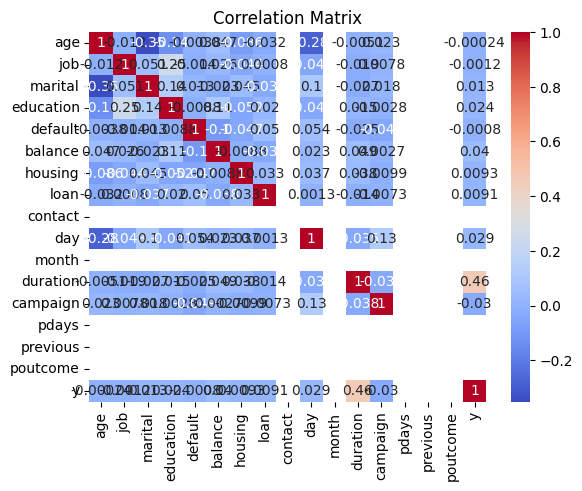

In [121]:


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

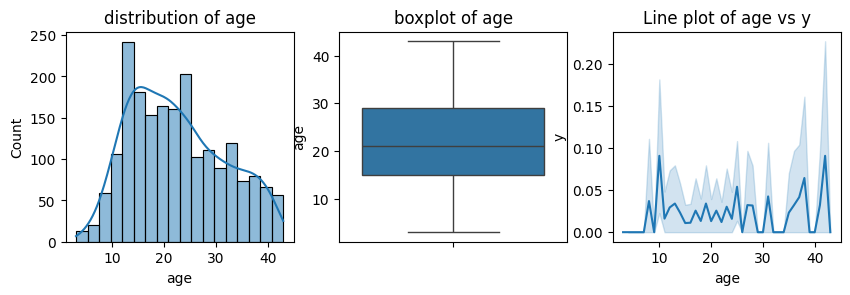

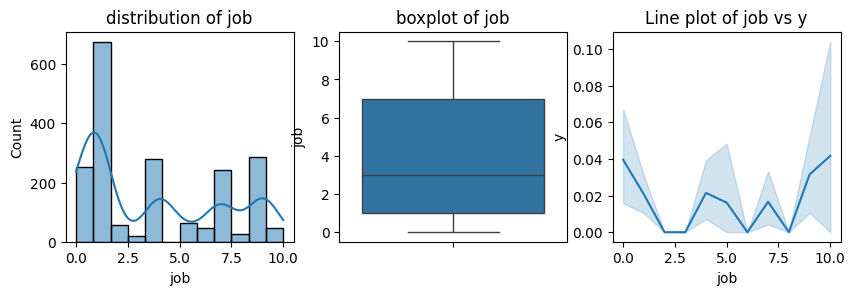

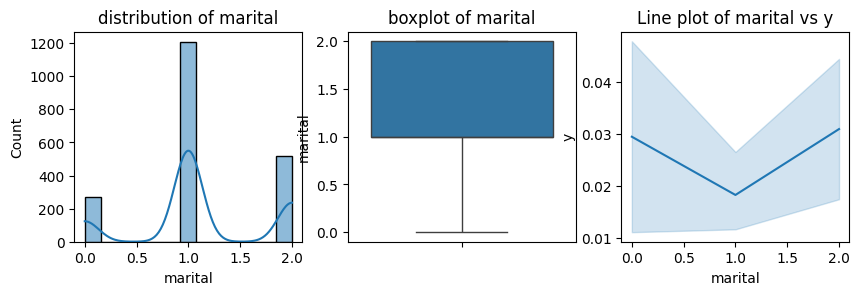

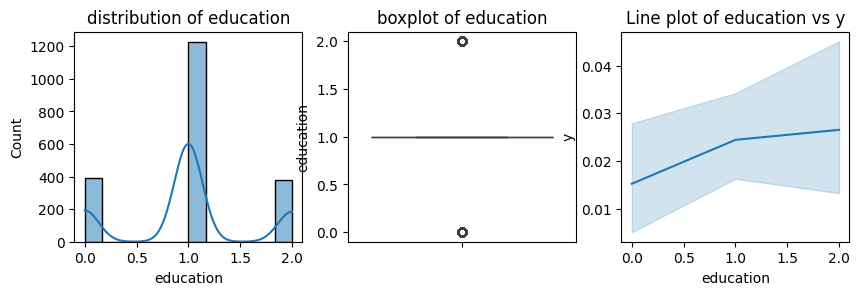

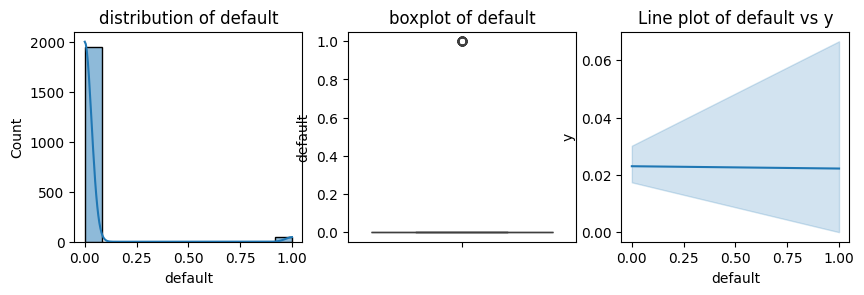

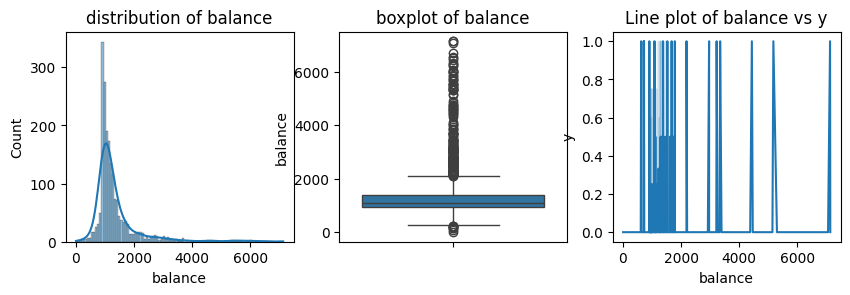

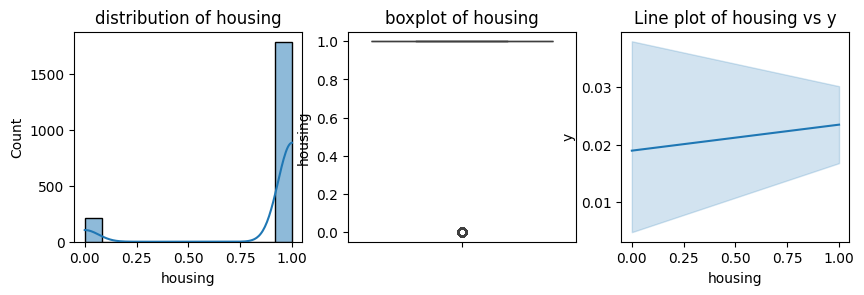

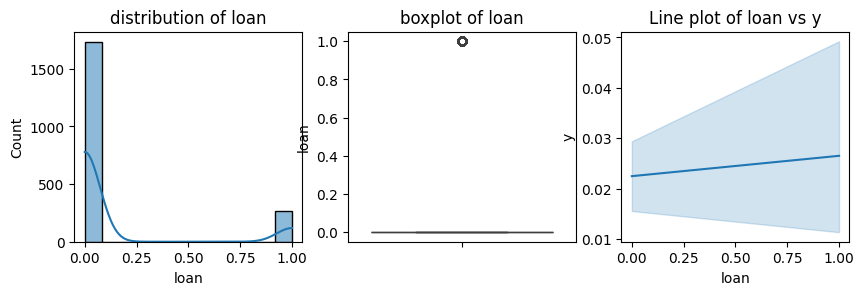

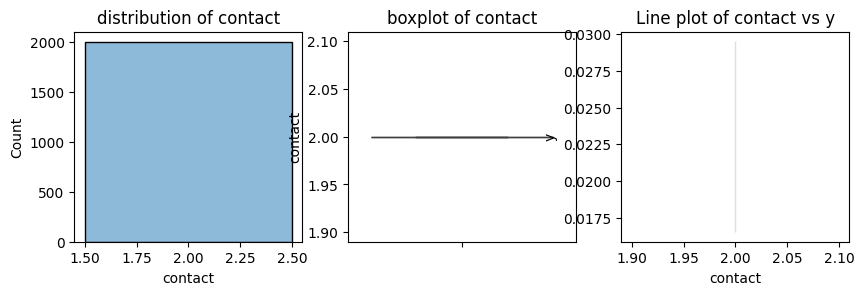

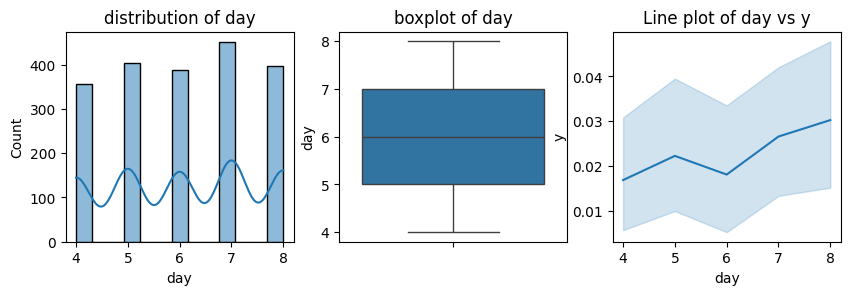

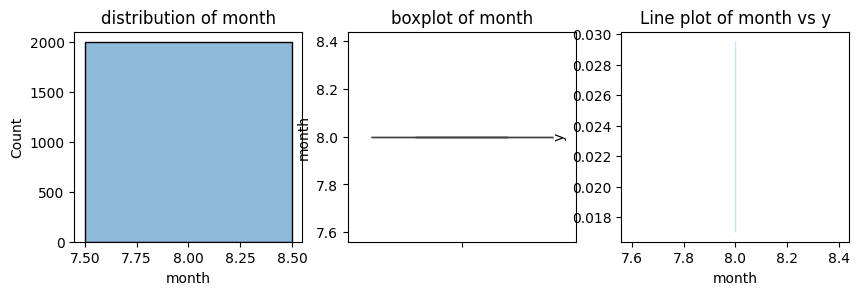

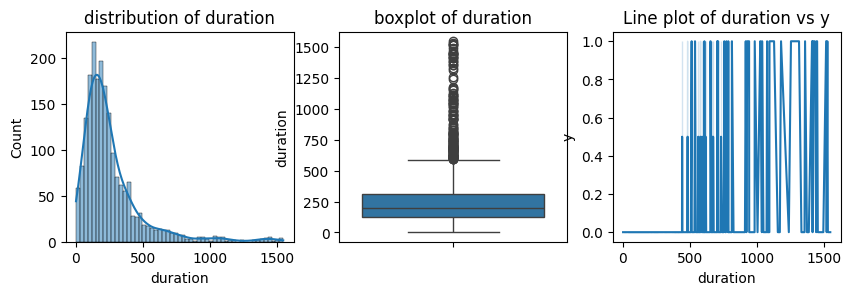

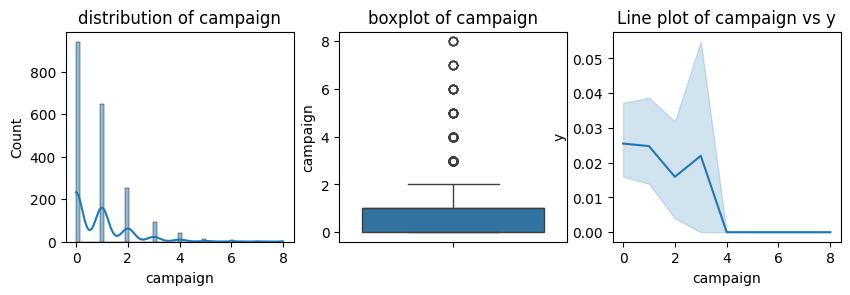

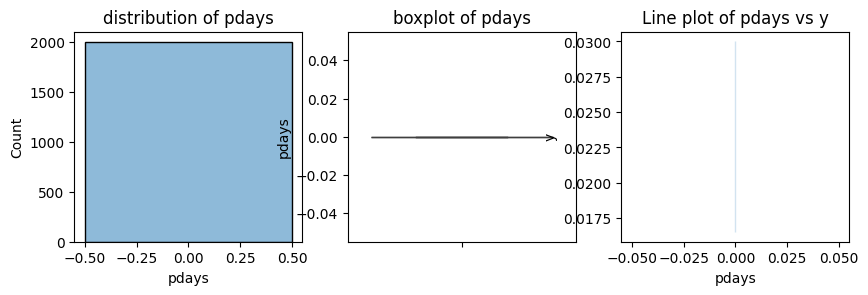

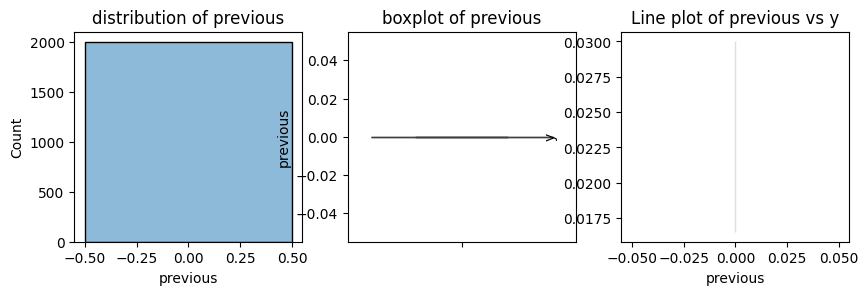

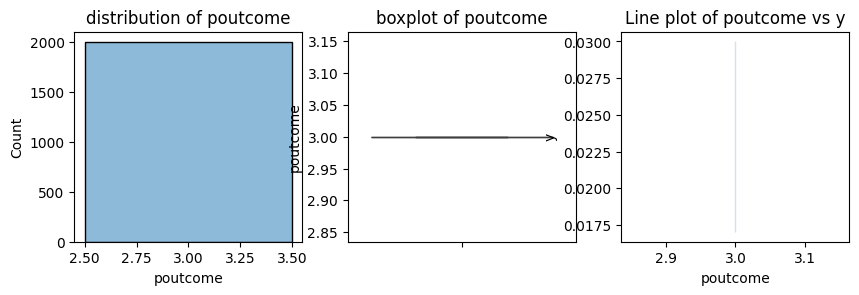

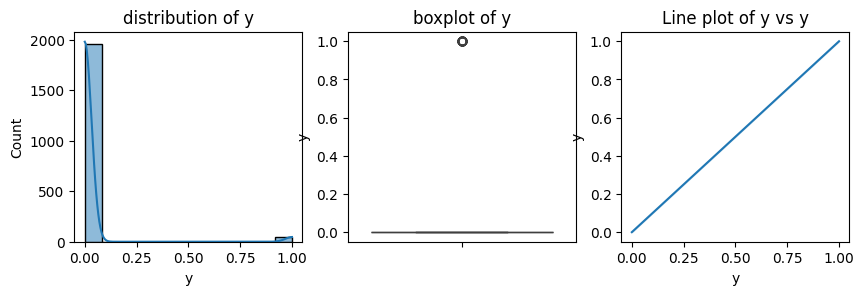

In [123]:
for i in data_mod.columns:
    if data_mod[i].dtype !="object":
        plt.figure(figsize=(10,6))

        plt.subplot(2,3,1)
        sns.histplot(data_mod[i], kde=True)
        plt.title(f"distribution of {i}")

        plt.subplot(2,3,2)
        sns.boxplot(data_mod[i])
        plt.ylabel(i)
        plt.title(f"boxplot of {i}")

        plt.subplot(2,3,3)
        sns.lineplot(data=data_mod, x=i, y="y")
        plt.title(f"Line plot of {i} vs y")